### Setup and Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

# NOTE: neural_final_proj should be installed as an editable package.
# Run this command in terminal:
# pip install -e .
from neural_final_proj.core_models import CustomCNN, ResNetSmall
from neural_final_proj.basic_utils import prepare_data_loaders, train_model, count_parameters
from neural_final_proj.interpretability import find_viz_indices, plot_interpretability_results

IMAGE_SIZE = 64 # Resizing to 64x64 pixels
BATCH_SIZE = 64
NUM_CLASSES = 10 
NUM_EPOCHS = 20
DATA_ROOT = 'data/Sports'
DEVICE = torch.device("cpu") 
MODELS_DIR = 'problem_A_outputs'

In [3]:
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir('..')
current_folder_name = os.path.basename(os.getcwd())

WIDTH = 30
print(f"{'Current directory:':<{WIDTH}}{current_folder_name}")
print(f"{'Using device:':<{WIDTH}}{DEVICE}")
print(f"{'Image Size:':<{WIDTH}}{IMAGE_SIZE}x{IMAGE_SIZE}")
print(f"{'Data will be pulled from:':<{WIDTH}}{DATA_ROOT}")
print(f"{'Models will be saved to:':<{WIDTH}}{MODELS_DIR}")

Current directory:            EE4745_Final_Proj
Using device:                 cpu
Image Size:                   64x64
Data will be pulled from:     data/Sports
Models will be saved to:      problem_A_outputs


### Data Preparation

In [4]:
try:
    train_loader, val_loader, class_names, val_dataset = prepare_data_loaders(
        DATA_ROOT, IMAGE_SIZE, BATCH_SIZE
    )
    print(f"Loaded {len(class_names)} classes: {class_names}")
    print(f"Train samples: {len(train_loader.dataset)}, Validation samples: {len(val_loader.dataset)}")
except Exception as e:
    print(f"\n--- DATASET ERROR ---")
    print(f"Please check that your dataset is located at '{DATA_ROOT}' with 'train' and 'valid' subfolders.")
    print(f"Error details: {e}")

Loaded 10 classes: ['baseball', 'basketball', 'football', 'golf', 'hockey', 'rugby', 'swimming', 'tennis', 'volleyball', 'weightlifting']
Train samples: 1593, Validation samples: 50


### Model Initialization and Training (Custom CNN)


In [7]:
CNN_LOG_DIR = 'runs/problem_A_CNN'
model_cnn = CustomCNN(num_classes=NUM_CLASSES).to(DEVICE)
print(f"CustomCNN initialized. Parameters: {count_parameters(model_cnn)}")

results_cnn = train_model(
    model_cnn, 
    "CustomCNN", 
    train_loader, 
    val_loader, 
    NUM_EPOCHS, 
    DEVICE,
    CNN_LOG_DIR,
    MODELS_DIR
)
print(f"\nCustomCNN Training Complete.")
WIDTH = 26
print(f"{'Final Validation Accuracy':<{WIDTH}}: {results_cnn['final_val_accuracy']:.2f}%")
print(f"{'Total Time Taken':<{WIDTH}}: {results_cnn['total_training_time']:.2f}s")

CustomCNN initialized. Parameters: 4293194

--- Training CustomCNN (Params: 4293194) on cpu ---
Epoch 1/20 | Train Acc: 27.12% | Val Acc: 36.00% | Time: 2.83s
Epoch 2/20 | Train Acc: 40.55% | Val Acc: 48.00% | Time: 2.84s
Epoch 3/20 | Train Acc: 49.78% | Val Acc: 44.00% | Time: 2.85s
Epoch 4/20 | Train Acc: 52.92% | Val Acc: 50.00% | Time: 2.81s
Epoch 5/20 | Train Acc: 57.56% | Val Acc: 60.00% | Time: 2.91s
Epoch 6/20 | Train Acc: 60.33% | Val Acc: 54.00% | Time: 2.90s
Epoch 7/20 | Train Acc: 64.72% | Val Acc: 62.00% | Time: 2.91s
Epoch 8/20 | Train Acc: 68.36% | Val Acc: 56.00% | Time: 2.86s
Epoch 9/20 | Train Acc: 70.37% | Val Acc: 66.00% | Time: 2.83s
Epoch 10/20 | Train Acc: 71.25% | Val Acc: 66.00% | Time: 2.88s
Epoch 11/20 | Train Acc: 74.14% | Val Acc: 66.00% | Time: 2.82s
Epoch 12/20 | Train Acc: 77.02% | Val Acc: 68.00% | Time: 2.85s
Epoch 13/20 | Train Acc: 78.66% | Val Acc: 68.00% | Time: 2.82s
Epoch 14/20 | Train Acc: 81.98% | Val Acc: 66.00% | Time: 2.84s
Epoch 15/20 | Tra

### Model Initialization and Training (ResNet Small)

In [8]:
RESNET_LOG_DIR = 'runs/problem_A_RESNET'

model_resnet = ResNetSmall(num_classes=NUM_CLASSES).to(DEVICE)
print(f"ResNetSmall initialized. Parameters: {count_parameters(model_resnet)}")

results_resnet = train_model(
    model_resnet,
    "ResNetSmall",   
    train_loader,
    val_loader,
    NUM_EPOCHS,
    DEVICE,
    RESNET_LOG_DIR,
    MODELS_DIR
)
print(f"\nResNetSmall Training Complete.")
WIDTH = 26
print(f"{'Final Validation Accuracy':<{WIDTH}}: {results_resnet['final_val_accuracy']:.2f}%")
print(f"{'Total Time Taken':<{WIDTH}}: {results_resnet['total_training_time']:.2f}s")

ResNetSmall initialized. Parameters: 701466

--- Training ResNetSmall (Params: 701466) on cpu ---
Epoch 1/20 | Train Acc: 35.22% | Val Acc: 18.00% | Time: 9.31s
Epoch 2/20 | Train Acc: 46.96% | Val Acc: 46.00% | Time: 9.42s
Epoch 3/20 | Train Acc: 52.73% | Val Acc: 46.00% | Time: 9.10s
Epoch 4/20 | Train Acc: 57.88% | Val Acc: 50.00% | Time: 8.77s
Epoch 5/20 | Train Acc: 60.20% | Val Acc: 54.00% | Time: 9.08s
Epoch 6/20 | Train Acc: 62.65% | Val Acc: 64.00% | Time: 8.64s
Epoch 7/20 | Train Acc: 65.29% | Val Acc: 64.00% | Time: 8.68s
Epoch 8/20 | Train Acc: 66.16% | Val Acc: 52.00% | Time: 8.64s
Epoch 9/20 | Train Acc: 70.31% | Val Acc: 62.00% | Time: 8.74s
Epoch 10/20 | Train Acc: 70.75% | Val Acc: 46.00% | Time: 8.63s
Epoch 11/20 | Train Acc: 70.24% | Val Acc: 68.00% | Time: 8.74s
Epoch 12/20 | Train Acc: 72.19% | Val Acc: 70.00% | Time: 9.42s
Epoch 13/20 | Train Acc: 75.20% | Val Acc: 74.00% | Time: 9.53s
Epoch 14/20 | Train Acc: 77.72% | Val Acc: 72.00% | Time: 8.86s
Epoch 15/20 | T

### Model Comparison and Reporting

In [9]:
data = [results_cnn, results_resnet]

WIDTH_MODEL = 15
WIDTH_COUNT = 18
WIDTH_TIME = 25
WIDTH_ACCURACY = 22

print("\n"+5*" "+"Model Overview\n"+(WIDTH_MODEL+WIDTH_COUNT+WIDTH_TIME+WIDTH_ACCURACY)*"-")
print(
    f"{'Model':<{WIDTH_MODEL}}" +
    f"{'Parameter Count':<{WIDTH_COUNT}}" + 
    f"{'Total Training Time (s)':<{WIDTH_TIME}}" +
    f"{'Final Val Accuracy (%)':<{WIDTH_ACCURACY}}"
)
for r in data:
    print(
        f"{r['model_name']:<{WIDTH_MODEL}}" +
        f"{r['parameter_count']:<{WIDTH_COUNT},d}" +
        f"{r['total_training_time']:<{WIDTH_TIME}.2f}" +
        f"{r['final_val_accuracy']:<{WIDTH_ACCURACY}.2f}"
    )


     Model Overview
--------------------------------------------------------------------------------
Model          Parameter Count   Total Training Time (s)  Final Val Accuracy (%)
CustomCNN      4,293,194         58.14                    74.00                 
ResNetSmall    701,466           182.03                   74.00                 


In [10]:
# Per-Class Performance (CustomCNN)
print(5*" "+"Per-Class Performance (CustomCNN)\n"+60*"-")
print(classification_report(results_cnn['all_labels'], 
                            results_cnn['all_preds'], 
                            target_names=class_names, 
                            output_dict=False,
                            zero_division=0))

     Per-Class Performance (CustomCNN)
------------------------------------------------------------
               precision    recall  f1-score   support

     baseball       0.67      0.80      0.73         5
   basketball       0.80      0.80      0.80         5
     football       1.00      0.40      0.57         5
         golf       1.00      0.60      0.75         5
       hockey       0.62      1.00      0.77         5
        rugby       0.50      0.40      0.44         5
     swimming       1.00      1.00      1.00         5
       tennis       0.67      0.80      0.73         5
   volleyball       0.60      0.60      0.60         5
weightlifting       0.83      1.00      0.91         5

     accuracy                           0.74        50
    macro avg       0.77      0.74      0.73        50
 weighted avg       0.77      0.74      0.73        50



In [11]:
# Per-Class Performance (ResNetSmall)
print(5*" "+"Per-Class Performance (ResNetSmall)\n"+60*"-")
print(classification_report(results_resnet['all_labels'], 
                            results_resnet['all_preds'], 
                            target_names=class_names, 
                            output_dict=False,
                            zero_division=0))

     Per-Class Performance (ResNetSmall)
------------------------------------------------------------
               precision    recall  f1-score   support

     baseball       1.00      0.80      0.89         5
   basketball       0.80      0.80      0.80         5
     football       1.00      0.40      0.57         5
         golf       0.71      1.00      0.83         5
       hockey       0.71      1.00      0.83         5
        rugby       1.00      0.40      0.57         5
     swimming       0.83      1.00      0.91         5
       tennis       0.56      1.00      0.71         5
   volleyball       0.25      0.20      0.22         5
weightlifting       1.00      0.80      0.89         5

     accuracy                           0.74        50
    macro avg       0.79      0.74      0.72        50
 weighted avg       0.79      0.74      0.72        50



### Visualization (Training/Validation Curves)

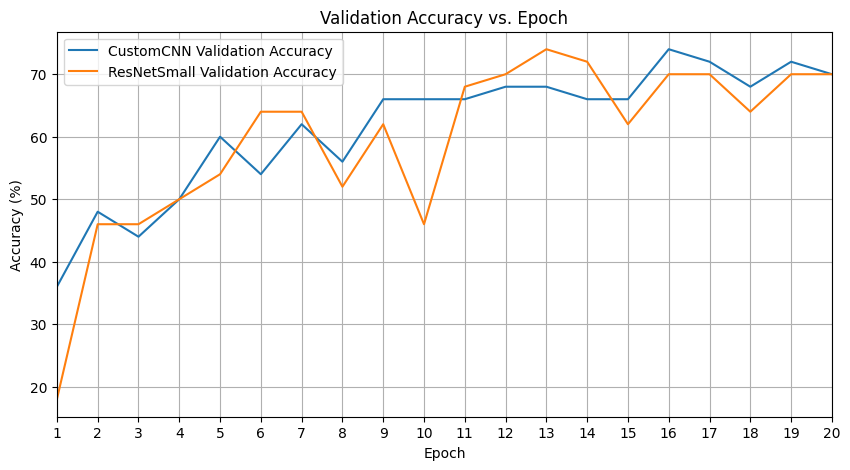

In [12]:
plt.figure(figsize=(10, 5))
x_epochs = np.arange(1, NUM_EPOCHS+1, 1)
plt.plot(x_epochs, results_cnn['val_accuracies'], label='CustomCNN Validation Accuracy')
plt.plot(x_epochs, results_resnet['val_accuracies'], label='ResNetSmall Validation Accuracy')
plt.title('Validation Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.xticks(x_epochs)
plt.xlim(1, NUM_EPOCHS)
plt.legend()
plt.grid(True)
plt.show()

# NOTE: The full loss and accuracy curves can be viewed in TensorBoard.
# Run this command in terminal:
# tensorboard --logdir runs

### Determine Samples to Visualize

In [14]:
target_classes = [0, 1, 2]

viz_map_cnn = find_viz_indices(
    model_preds=results_cnn['all_preds'], 
    model_name=results_cnn['model_name'], 
    target_labels_indices=target_classes, 
    true_labels=results_cnn['all_labels'],
    class_names=class_names
)

viz_map_resnet = find_viz_indices(
    model_preds=results_resnet['all_preds'], 
    model_name=results_resnet['model_name'], 
    target_labels_indices=target_classes, 
    true_labels=results_resnet['all_labels'],
    class_names=class_names
)

print("\n--- Visualization Tasks Ready ---")
print(f"Total tasks generated: {len(viz_map_cnn)+len(viz_map_resnet)}")


--- Searching Samples using CustomCNN Results ---
FOUND: baseball - CORRECT (Index: 0)
FOUND: baseball - MISCLASSIFIED (Index: 2) -> PREDICTED: tennis
FOUND: basketball - CORRECT (Index: 5)
FOUND: basketball - MISCLASSIFIED (Index: 7) -> PREDICTED: rugby
FOUND: football - CORRECT (Index: 10)
FOUND: football - MISCLASSIFIED (Index: 11) -> PREDICTED: tennis

--- Searching Samples using ResNetSmall Results ---
FOUND: baseball - CORRECT (Index: 0)
FOUND: baseball - MISCLASSIFIED (Index: 2) -> PREDICTED: tennis
FOUND: basketball - CORRECT (Index: 5)
FOUND: basketball - MISCLASSIFIED (Index: 6) -> PREDICTED: volleyball
FOUND: football - CORRECT (Index: 10)
FOUND: football - MISCLASSIFIED (Index: 11) -> PREDICTED: golf

--- Visualization Tasks Ready ---
Total tasks generated: 12


### Model Interpretability (Saliency & Grad-CAM)

Generating Interpretability Visualizations (12 Total Tasks)

VISUALIZING: CustomCNN: Correct: baseball


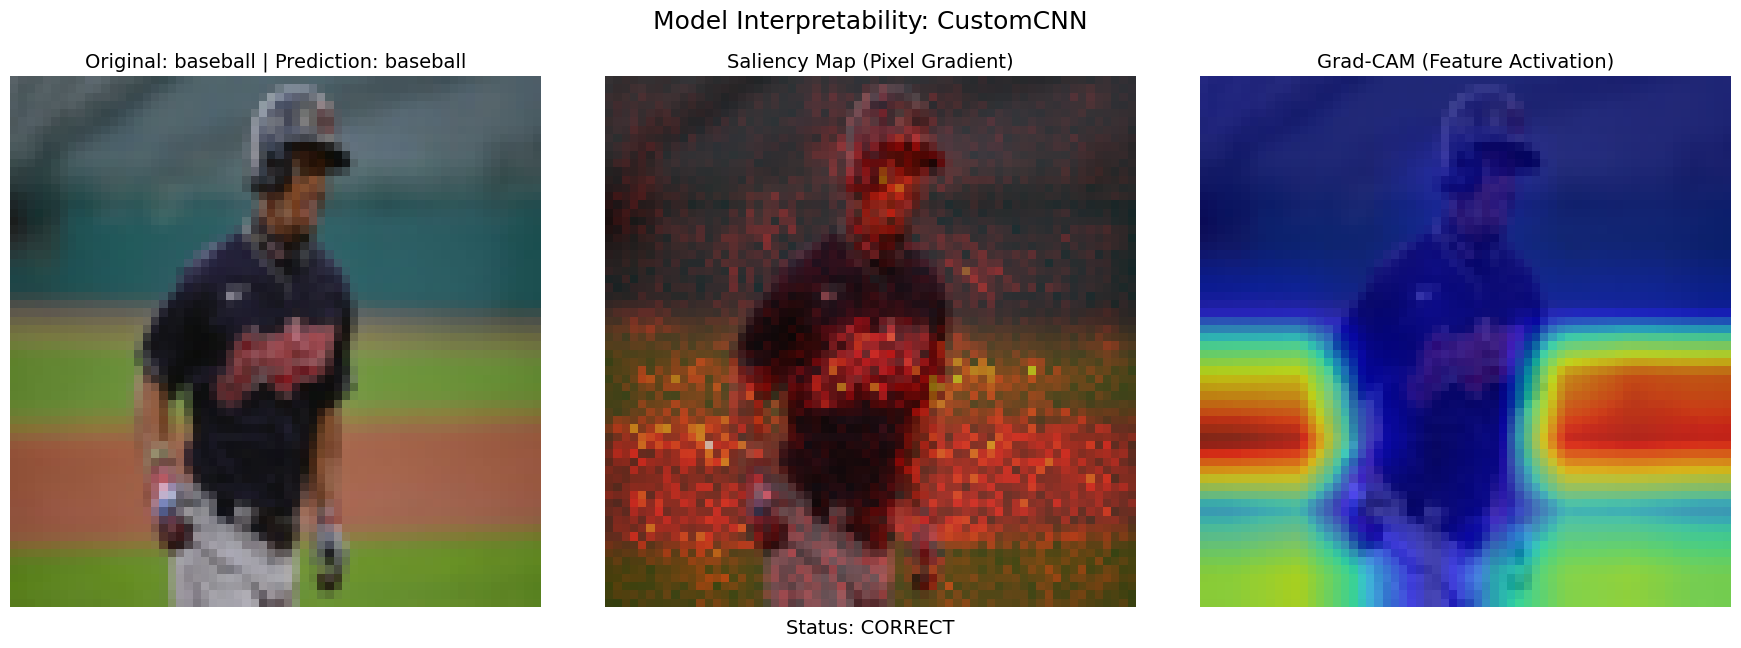


VISUALIZING: CustomCNN: Misclassified: baseball -> tennis


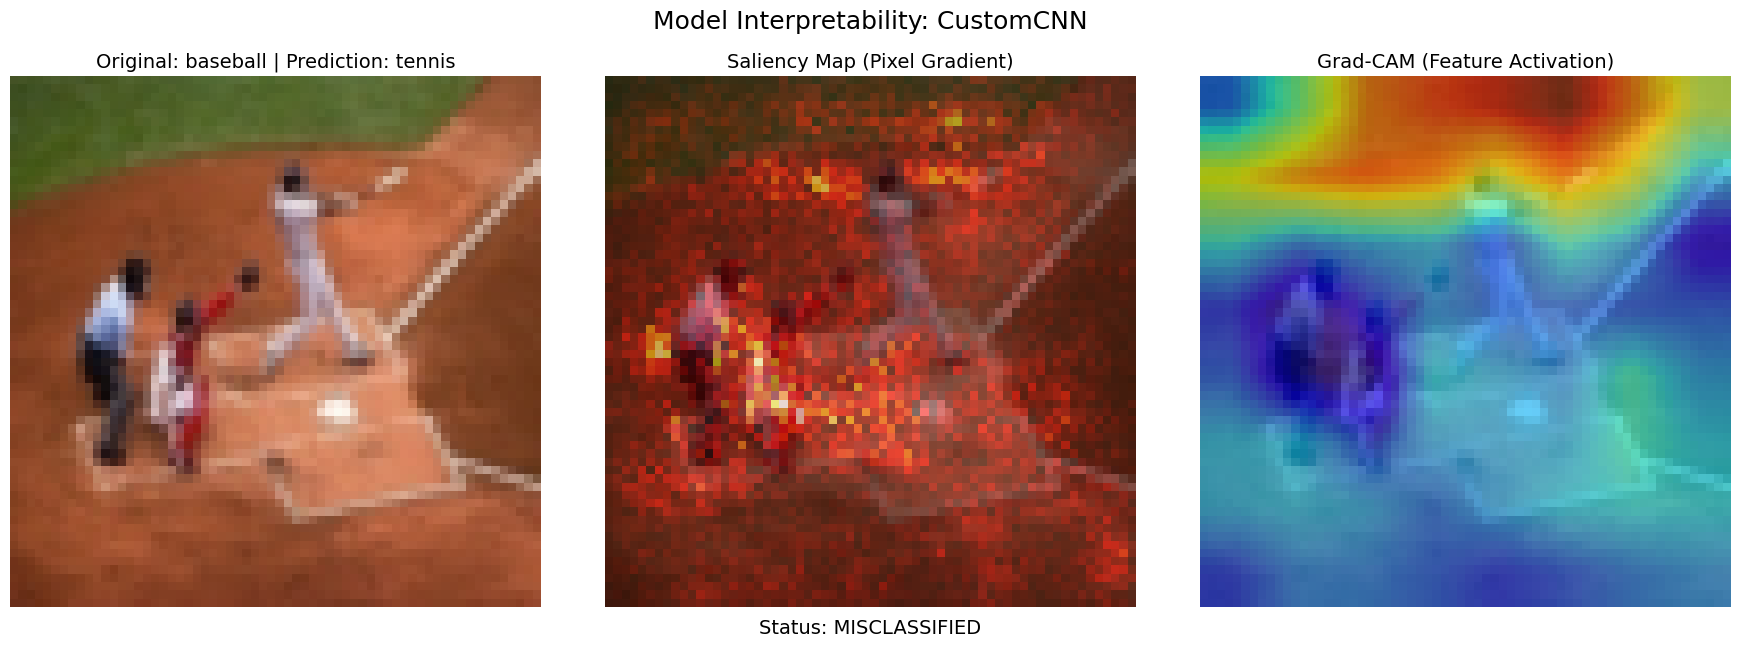


VISUALIZING: CustomCNN: Correct: basketball


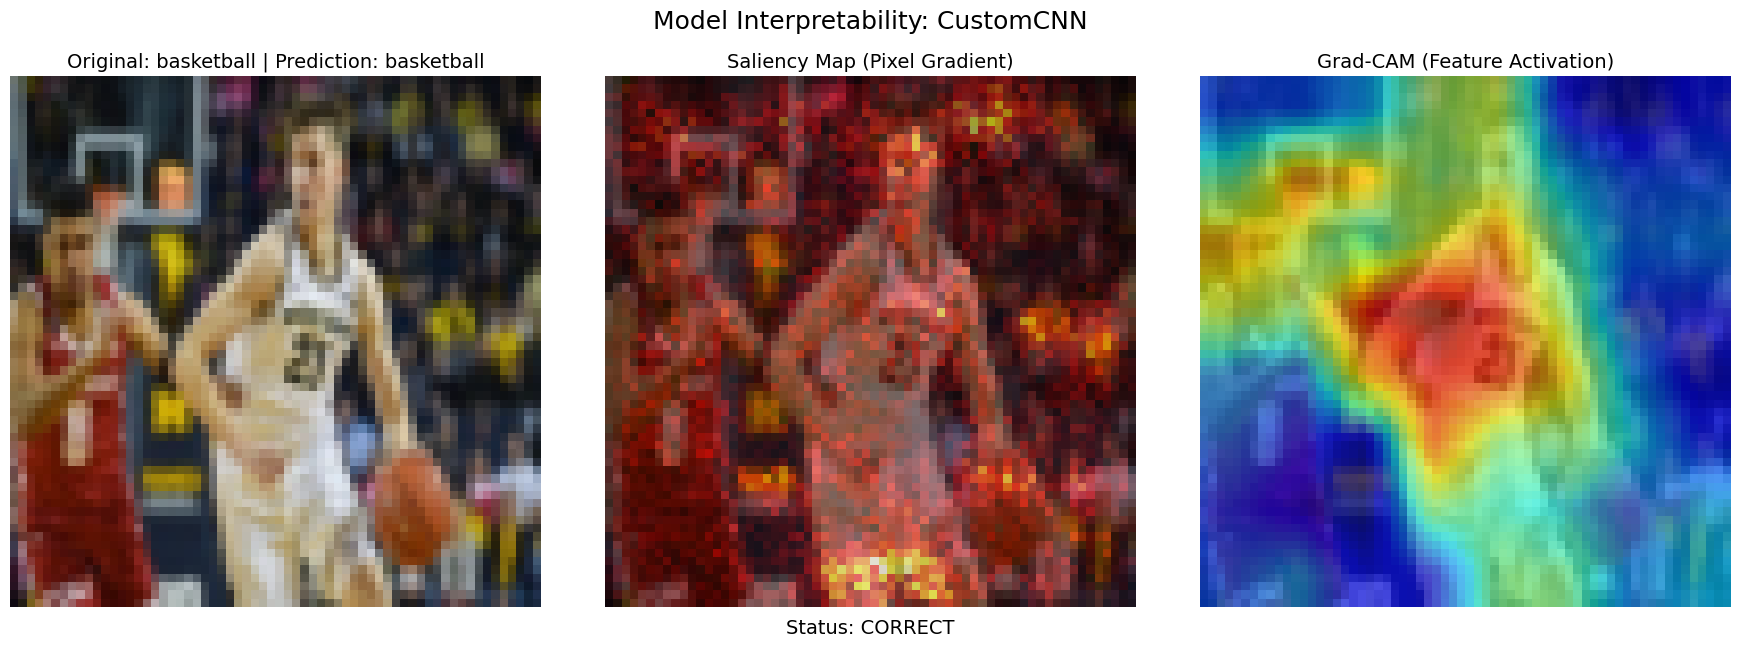


VISUALIZING: CustomCNN: Misclassified: basketball -> rugby


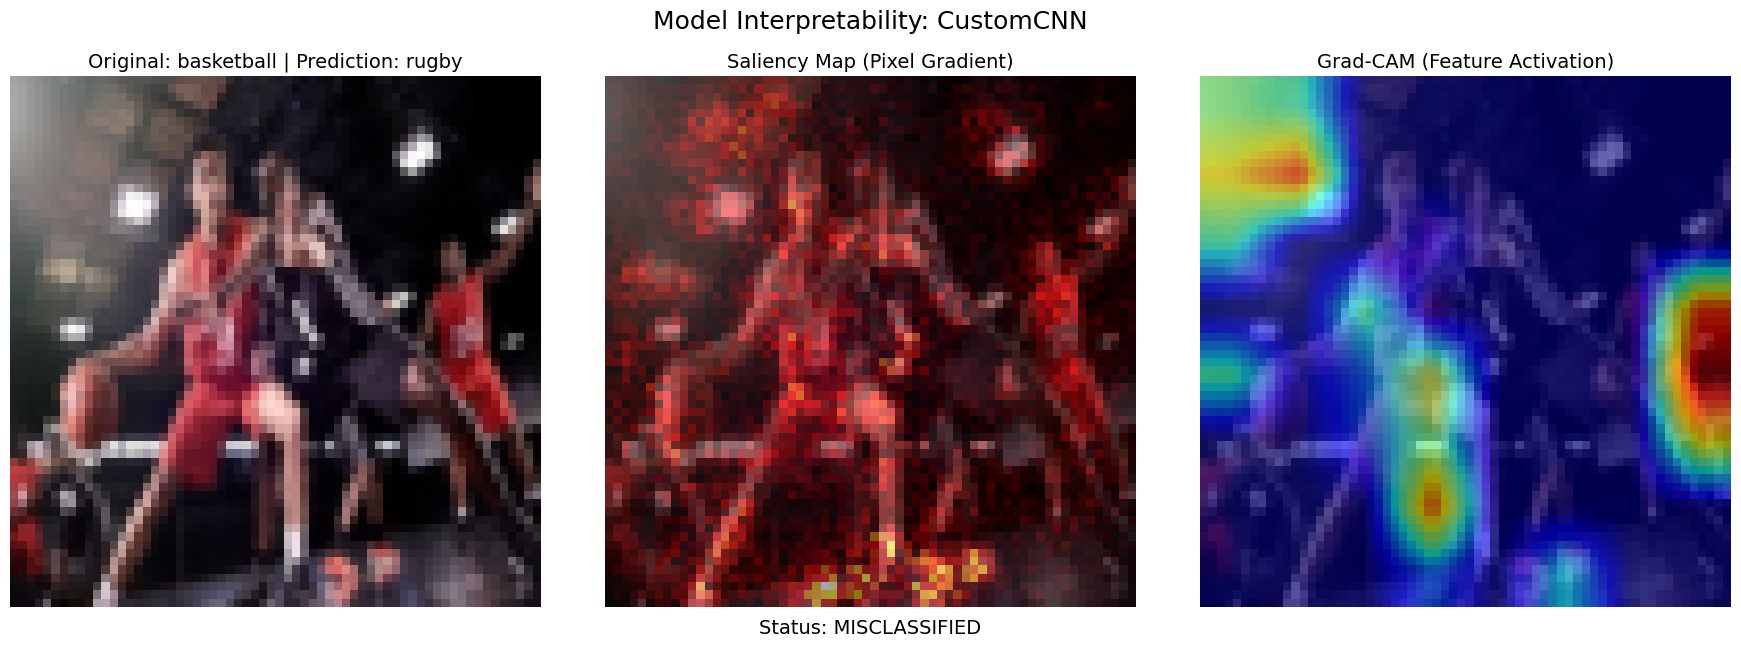


VISUALIZING: CustomCNN: Correct: football


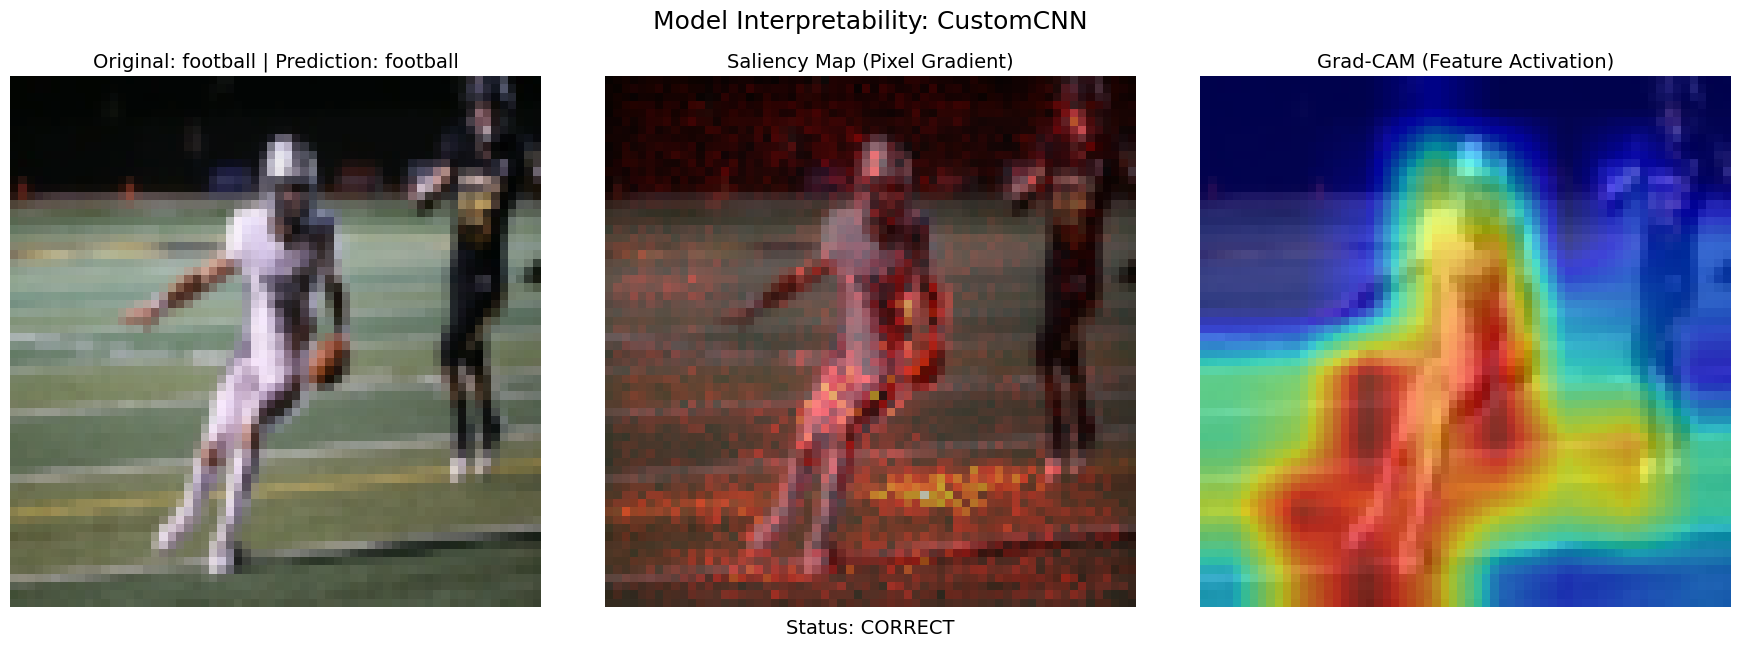


VISUALIZING: CustomCNN: Misclassified: football -> tennis


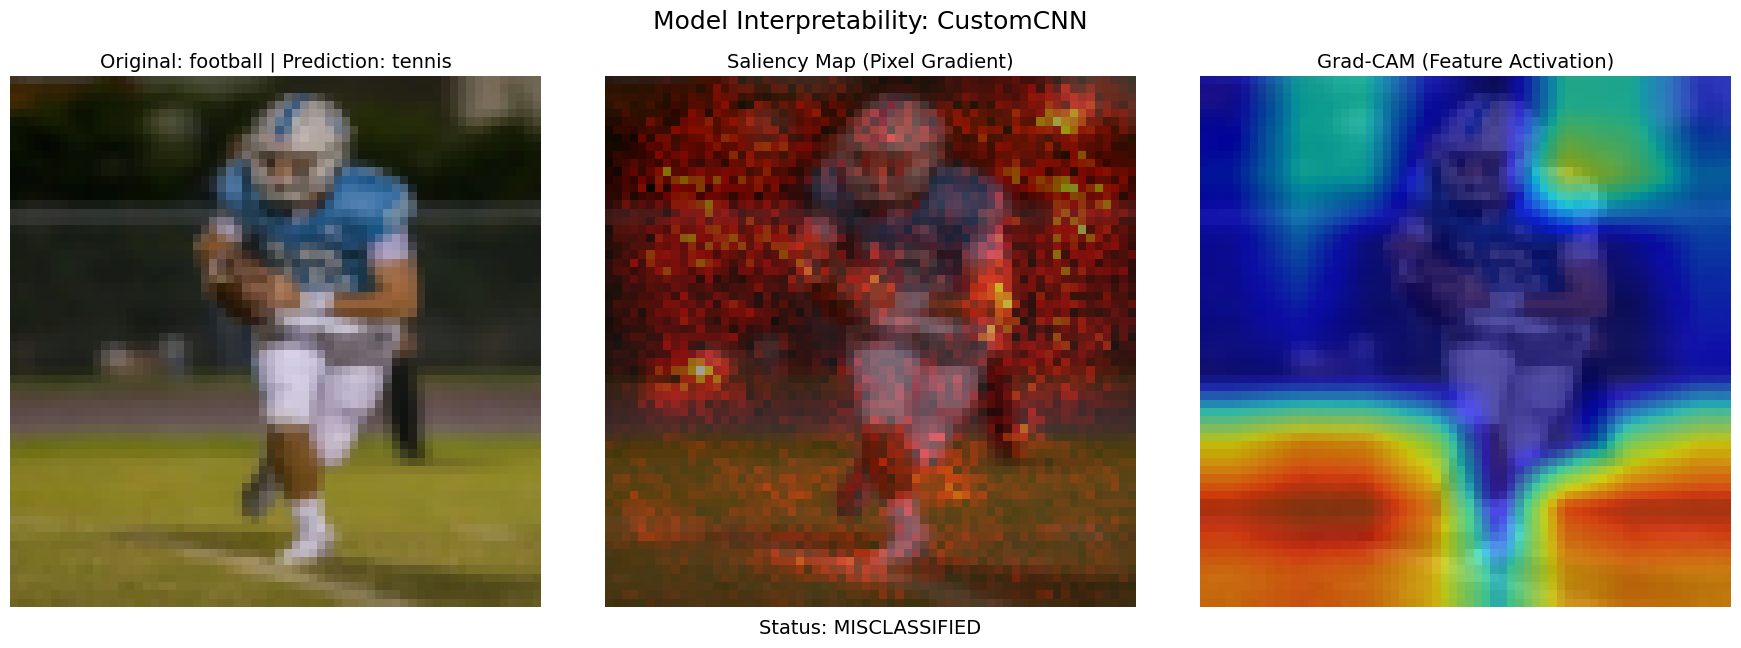


VISUALIZING: ResNetSmall: Correct: baseball


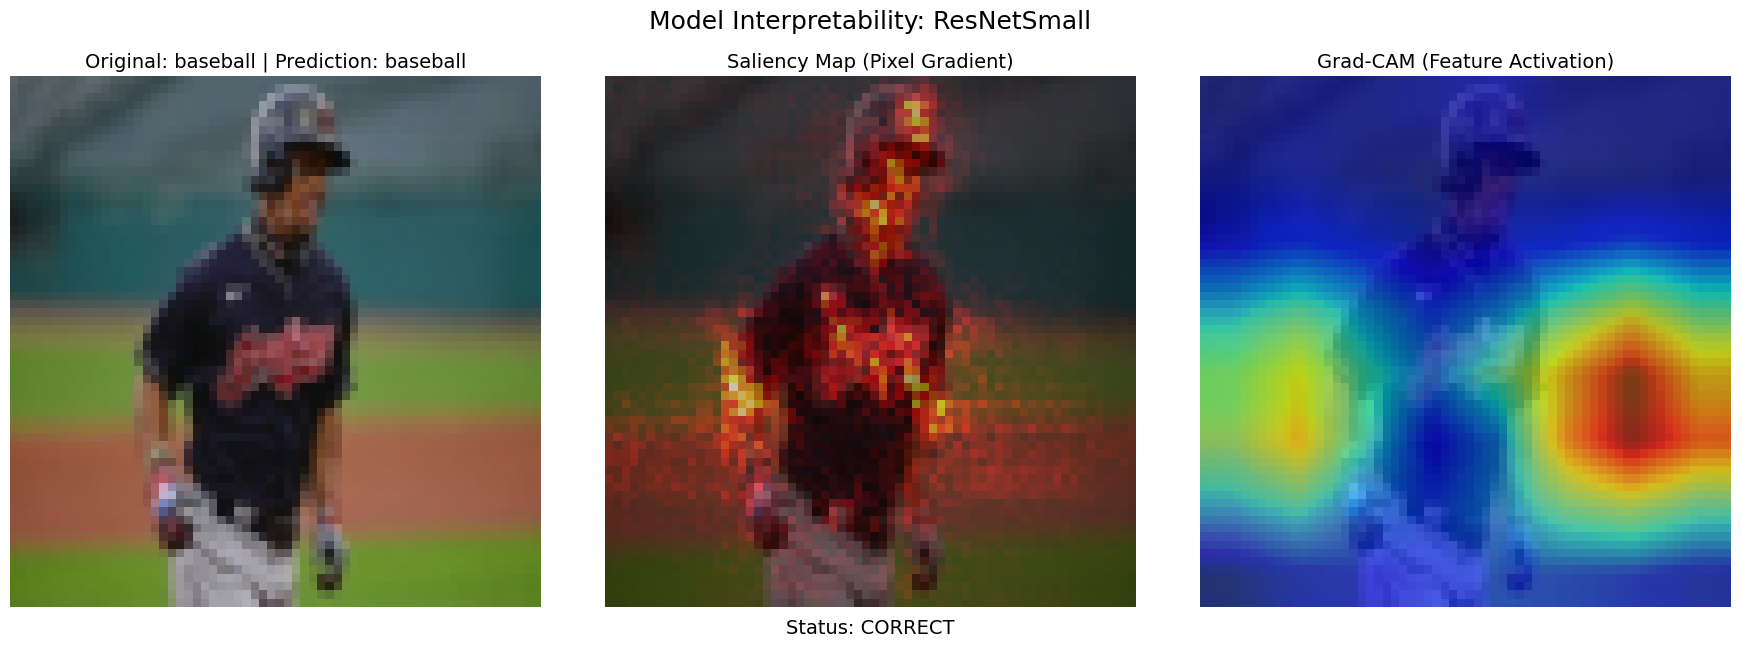


VISUALIZING: ResNetSmall: Misclassified: baseball -> tennis


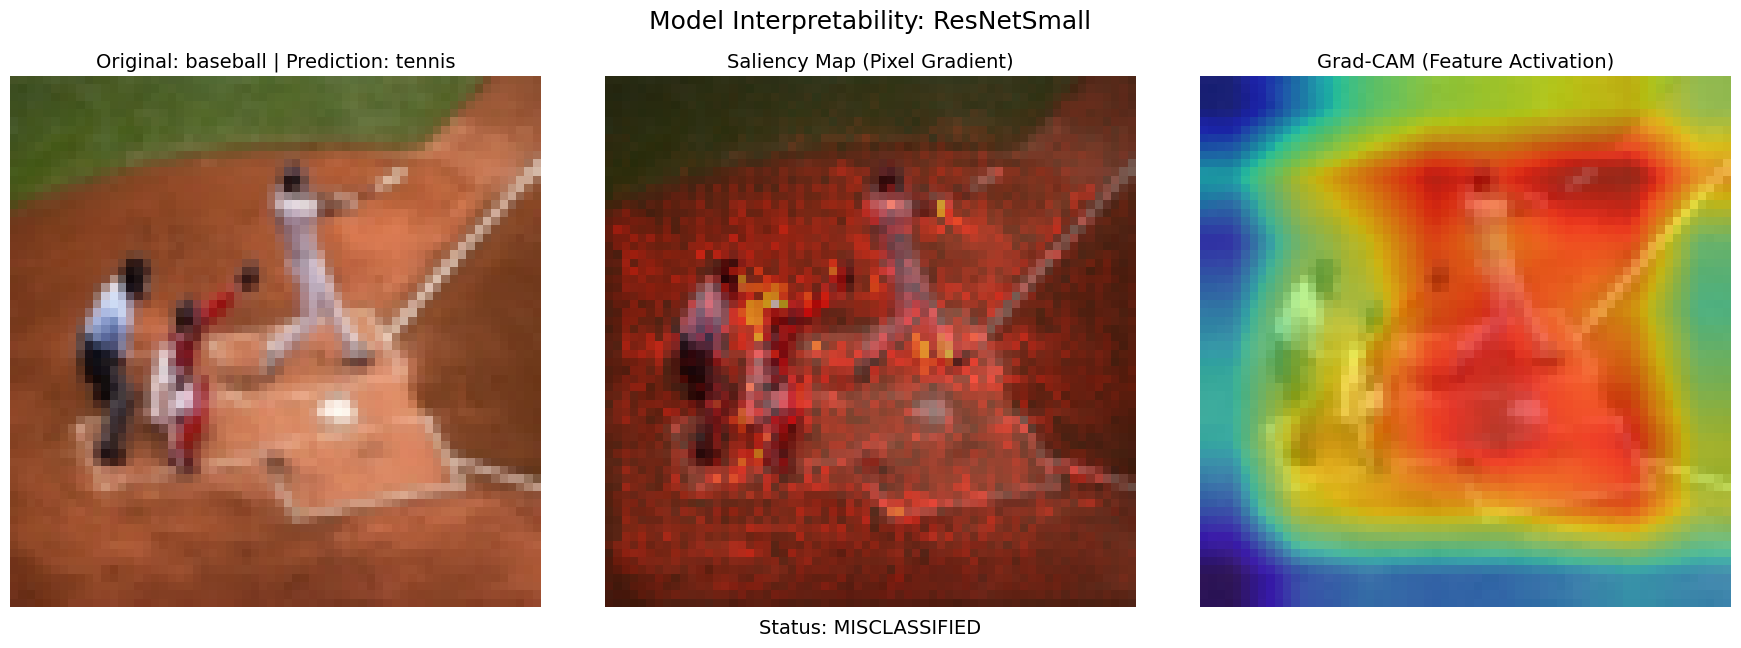


VISUALIZING: ResNetSmall: Correct: basketball


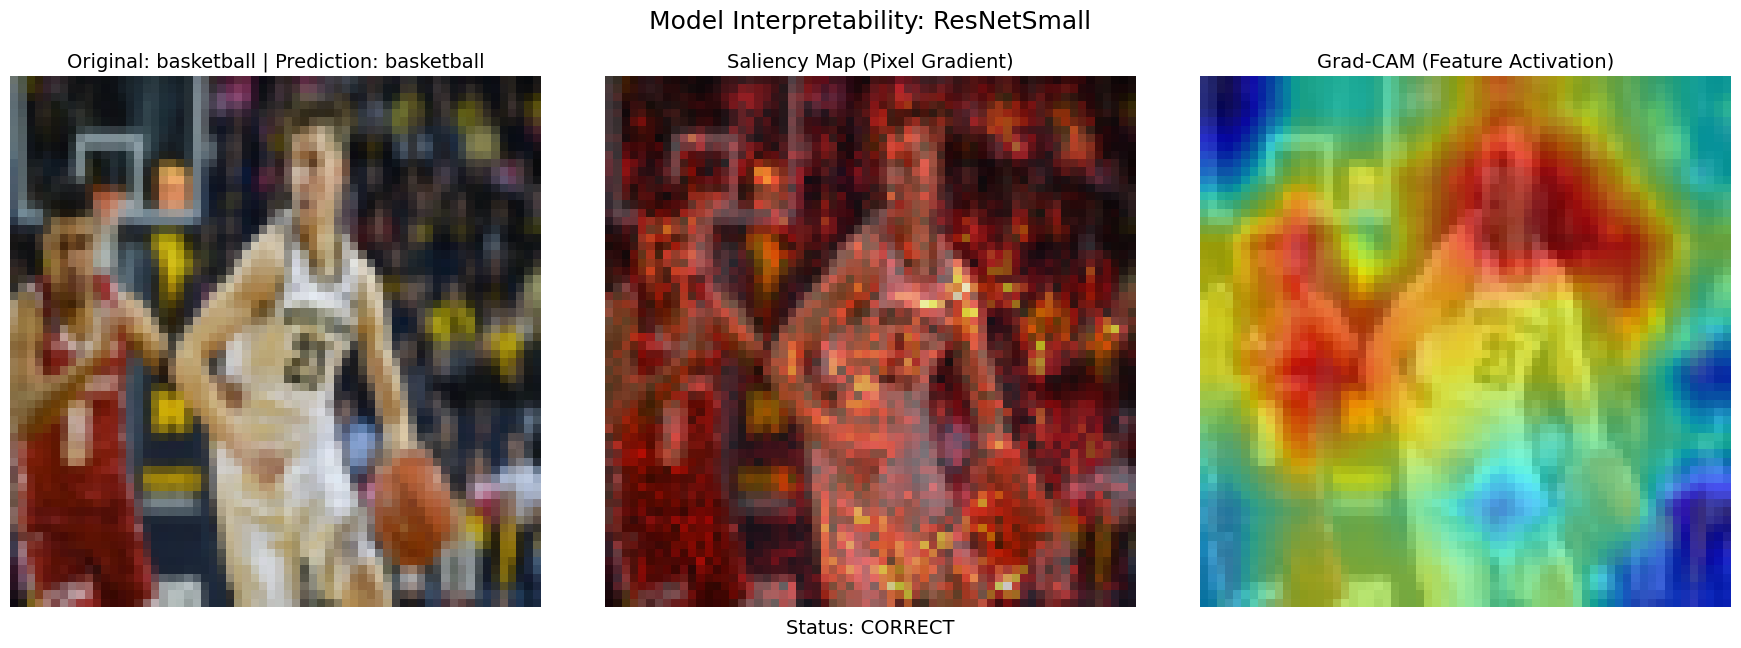


VISUALIZING: ResNetSmall: Misclassified: basketball -> volleyball


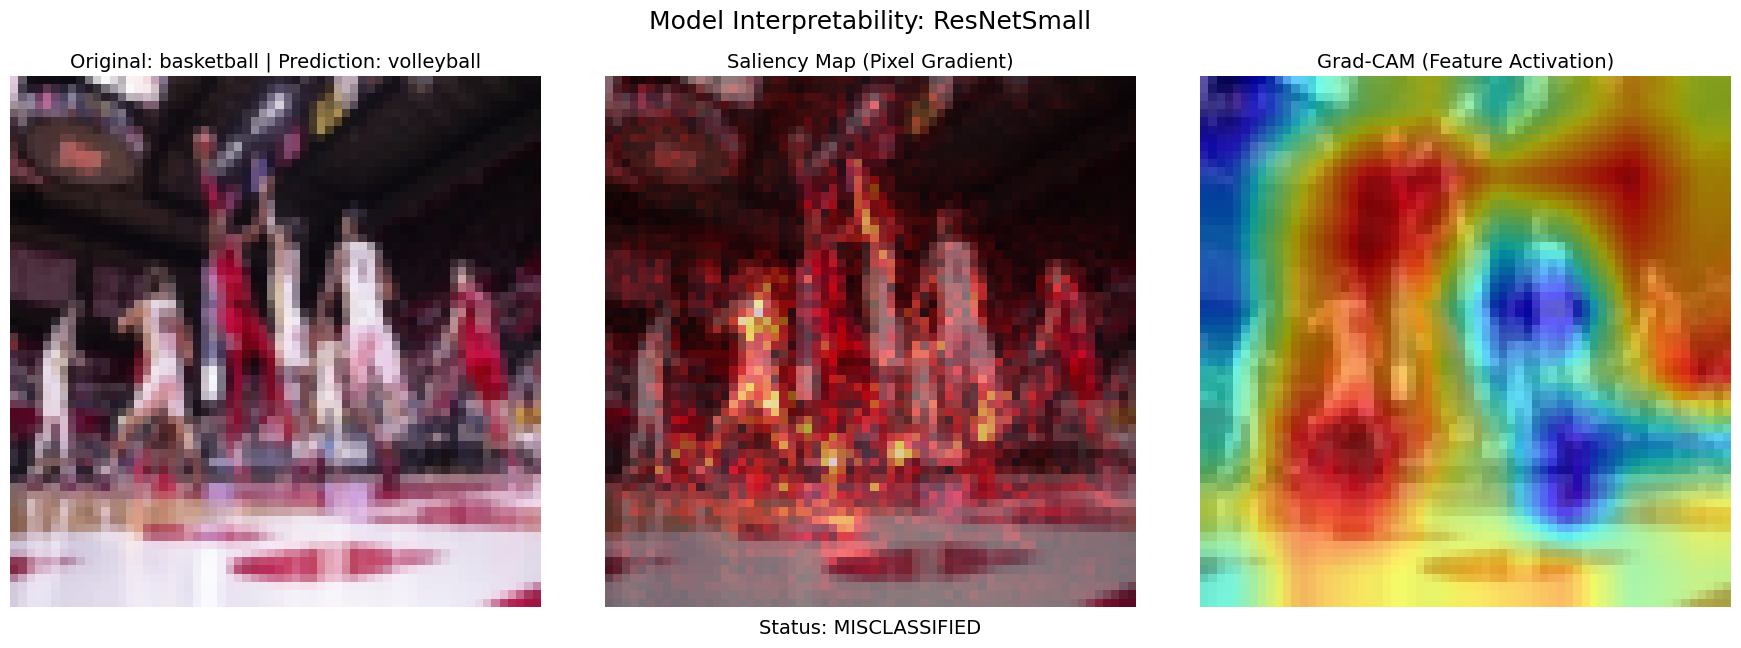


VISUALIZING: ResNetSmall: Correct: football


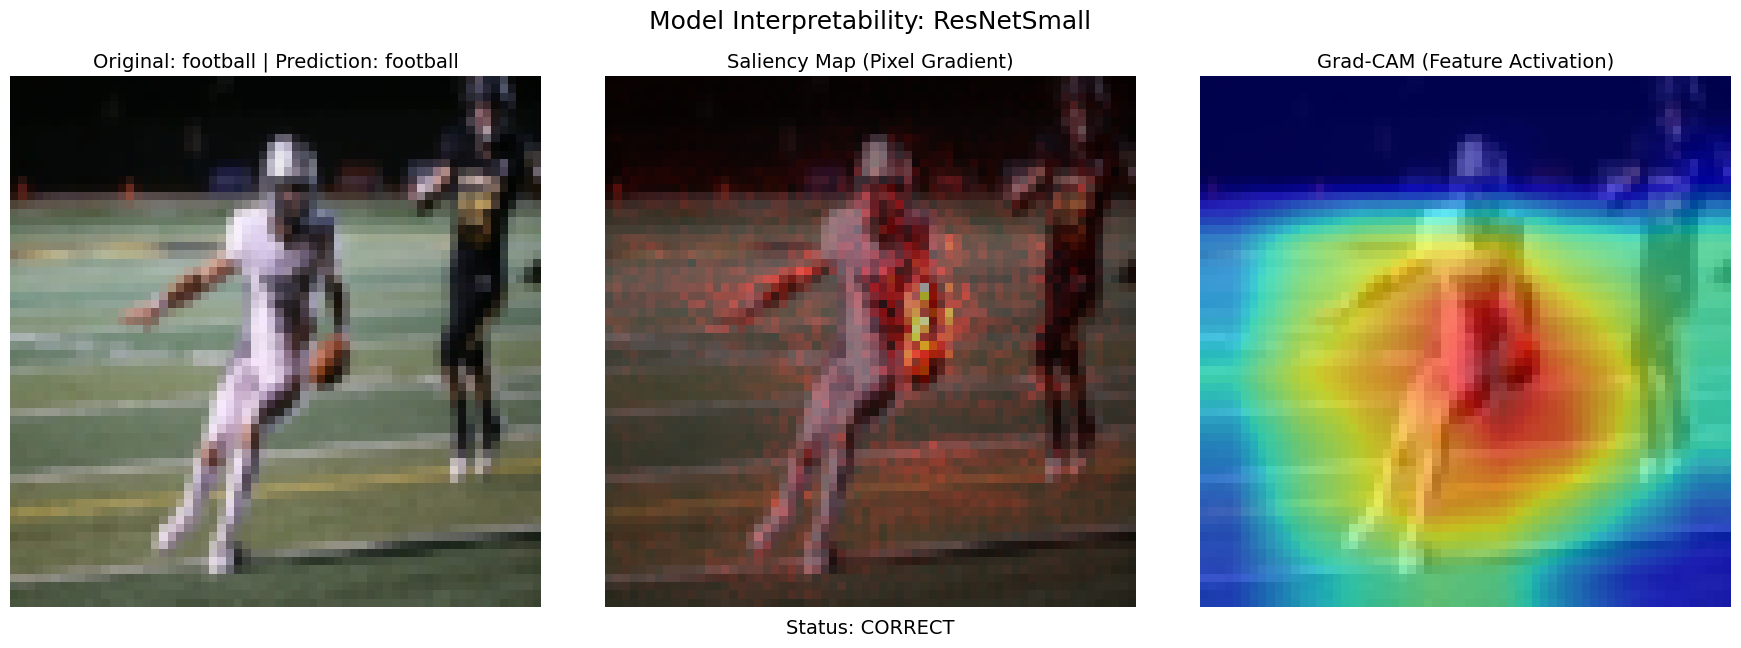


VISUALIZING: ResNetSmall: Misclassified: football -> golf


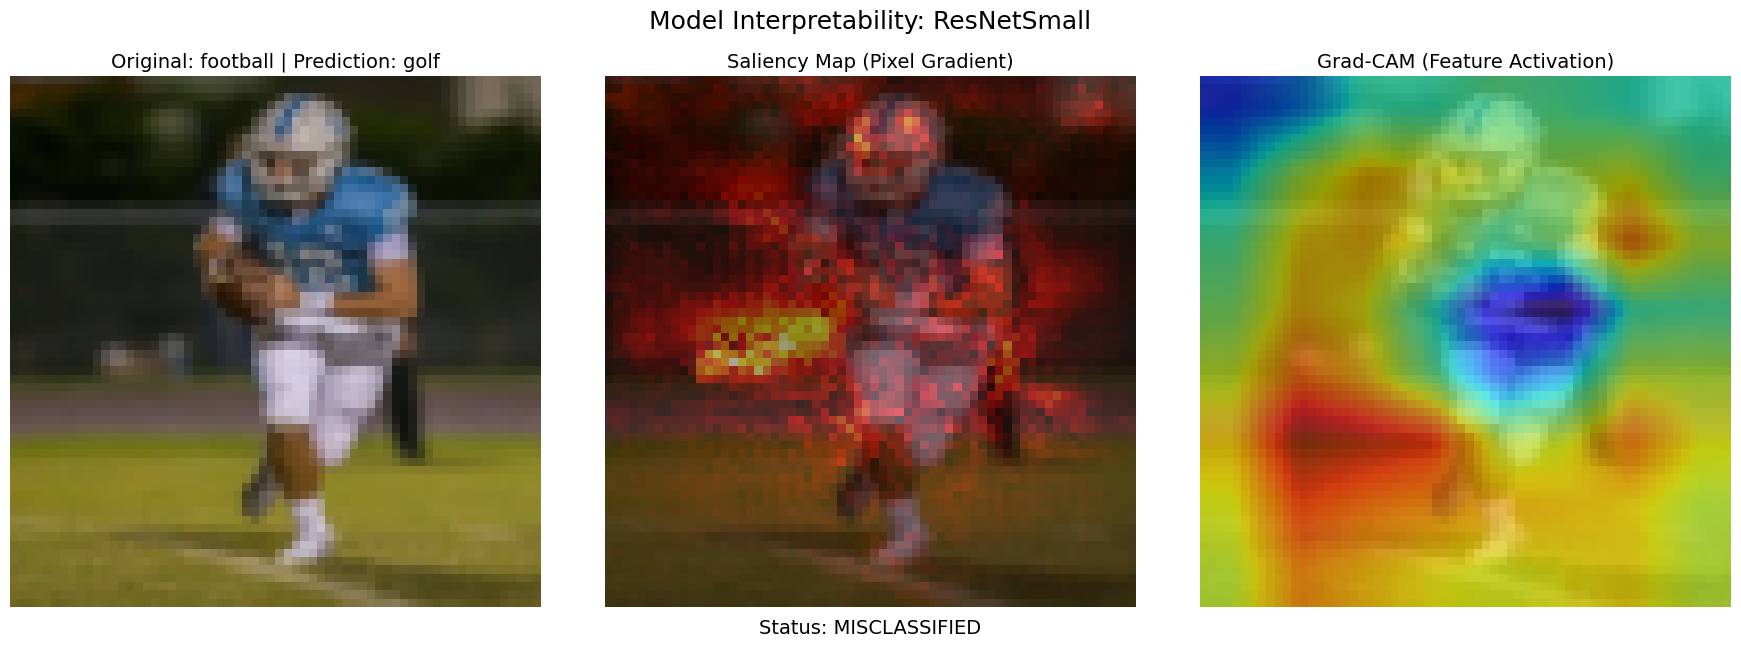


--- Interpretability Visualization Complete ---


In [32]:
# --- Consolidated Visualization Cell ---

print("Generating Interpretability Visualizations (12 Total Tasks)")
print("="*60)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for viz_title, sample_idx in viz_map_cnn.items():

    sample_img_tensor, actual_label_idx = val_dataset[sample_idx] 
    input_tensor = sample_img_tensor.unsqueeze(0).to(DEVICE)
    actual_class = class_names[actual_label_idx]
    
    print(f"\nVISUALIZING: {viz_title}")
    
    plot_interpretability_results(
        model=model_cnn, 
        model_name="CustomCNN", 
        input_tensor=input_tensor, 
        sample_img_tensor=sample_img_tensor, 
        actual_label=actual_label_idx, 
        class_names=class_names,
        models_dir=MODELS_DIR
    )

for viz_title, sample_idx in viz_map_resnet.items():

    sample_img_tensor, actual_label_idx = val_dataset[sample_idx] 
    input_tensor = sample_img_tensor.unsqueeze(0).to(DEVICE)
    actual_class = class_names[actual_label_idx]
    
    print(f"\nVISUALIZING: {viz_title}")
    
    plot_interpretability_results(
        model=model_resnet, 
        model_name="ResNetSmall", 
        input_tensor=input_tensor, 
        sample_img_tensor=sample_img_tensor, 
        actual_label=actual_label_idx, 
        class_names=class_names,
        models_dir=MODELS_DIR
    )

print("\n--- Interpretability Visualization Complete ---")